# Netflix Data: Cleaning, Analysis and Visualisation
By Kumud Rathore, Priyodip Sanyal, Om Bhayde & Sharon Reji

This file was obtained from [Kaggle](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization) and the purpose of this analysis is to understand the content strategy and changes the streaming platform Netflix has done between 2008-2021.

##Discussing the dataset
There is a single dataset that is being used, the netflix1.csv. This file was obtained from [Kaggle](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization) and it is an already cleaned version of another file.

This data set consist on contents added to Netflix from 2008 to 2021. The variables of this data set are:
- *show_id*: Netflix ID of the media.
- *Type*: Movie or TV Show.
- *title*: Title of the media.
- *director*: Director of the media.
- *country*: Country in which the movie was made.
- *date_added*: Date in which the media was added.
- *release_year*: Year in which the media was released.
- *rating*: Age rating of the media.
- *duration*: Duration of the media.
- *listen_in*: Classification given by Netflix.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Gathering
In this section of the report, we will gather the dataset and turn it into a DataFrame.

In [ ]:
# Importing the data from a csv file to a DataFrame
df = pd.read_csv("../input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")
# Showing the first five values of the DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Assessing
This section of the report we will assess any issues the data may have.

In [ ]:
# Let's check the status of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Checking if there are any duplicates
df.duplicated().value_counts()

False    8790
dtype: int64

In [ ]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [ ]:
# Performing a basic visual analysis of the data.
# pd.set_option('display.max_rows', 220)
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


## Data Cleaning
In this section of the the quality and redundance issues mentioned in the assessment.

In [ ]:
# Before cleaning, lets make a copy of the dataframe.
df_clean = df.copy()

### 'date_added' variable has wrong data type

#### Define
The variable 'date_added' has been categorised as an object (string), the most appropriate type of data for this variable would be datetime.



In [ ]:
df_clean.date_added = pd.to_datetime(df_clean.date_added)

#### Test

In [ ]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


### 'listed_in' variable has several variables

#### Define
The 'listed_in' variable can have several categories per media, we would like to create new variables to be able to extract this and correctly filter the data. We will assume that the first category would be the 'main' category of the movie.

#### Code

### Two different observation on a single dataset

####Define
There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.



In [ ]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

In [ ]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

##Analysing and Visualisation of Data


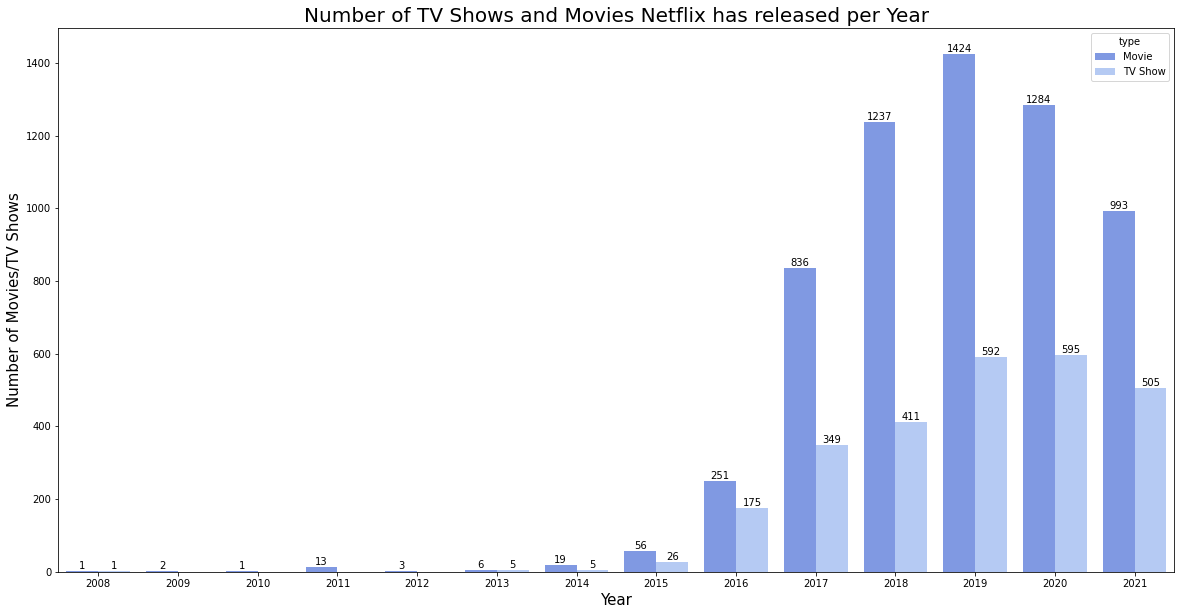

In [ ]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

#### Comments on the Number of Netflix's media released per year.

It seems like for both TV shows and Movies there has been a steady increase since the start of 2008; the only big drop happening in 2021 possibly due to the economic impact of COVID.

Before 2017, the number of TV Shows and Movies brought to the streaming service was on par. However, after 2017 the company started introducing more movies into the service more than doubling TV Shows in the amount of content.

###TV Shows

In [ ]:
df_clean.date_added.dt.year.count()

8790

In [ ]:
#Checking how many countries have produced a TV Show for Netlix
len(df_tv.groupby('country').count().index)

59

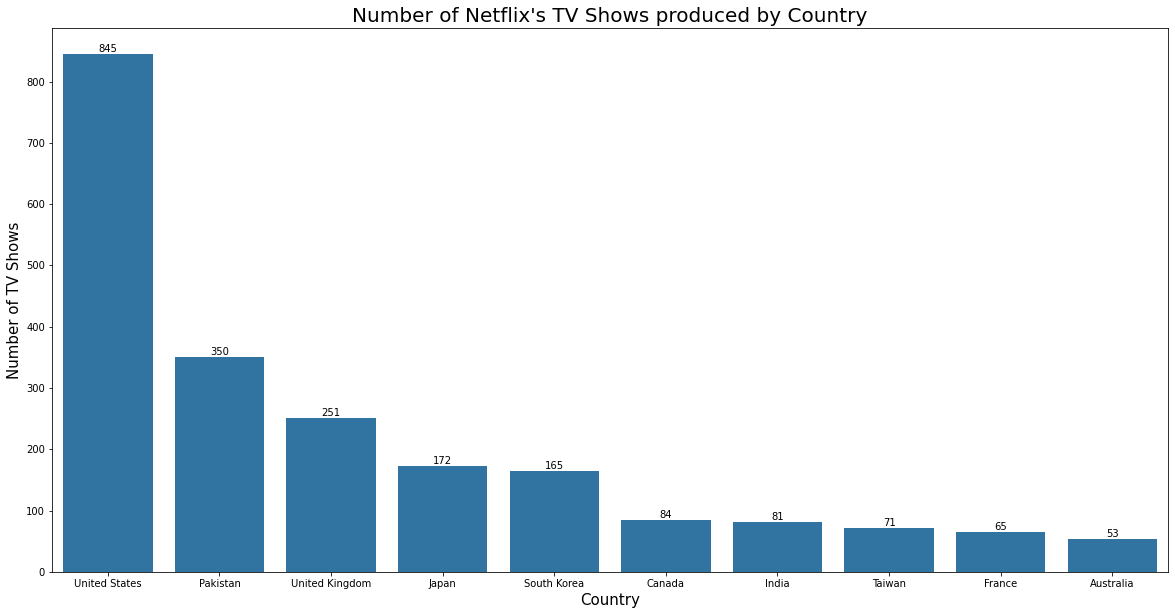

In [ ]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)

Relationship between Netflix's TV Shows genres and the year added to the platform.
For this analysis an assumption had to be made, the first category that appears on a TV show would be classified as the 'main' category, followed by the secondary and the third.      

Most of the TV shows produced were International TV Shows followed by Crime shows and Kids TV.

For secondary genres, most of TV shows do not have a secondary genre . But the rest were mainly classified as International TV Shows, TV dramas and TV comedies.

For third genres, Most of TV shows do not have a third genre. But the rest were mainly classified as TV Dramas, TV comedies and Romantic TV shows.

Since International TV Shows is a broad genre, we also performed an analysis on the secondary genres for International TV Shows. The result was that most of them do not have a secondary genre. But the rest were mainly classified as TV Dramas, Romantic TV shows and TV comedies.

 Movies

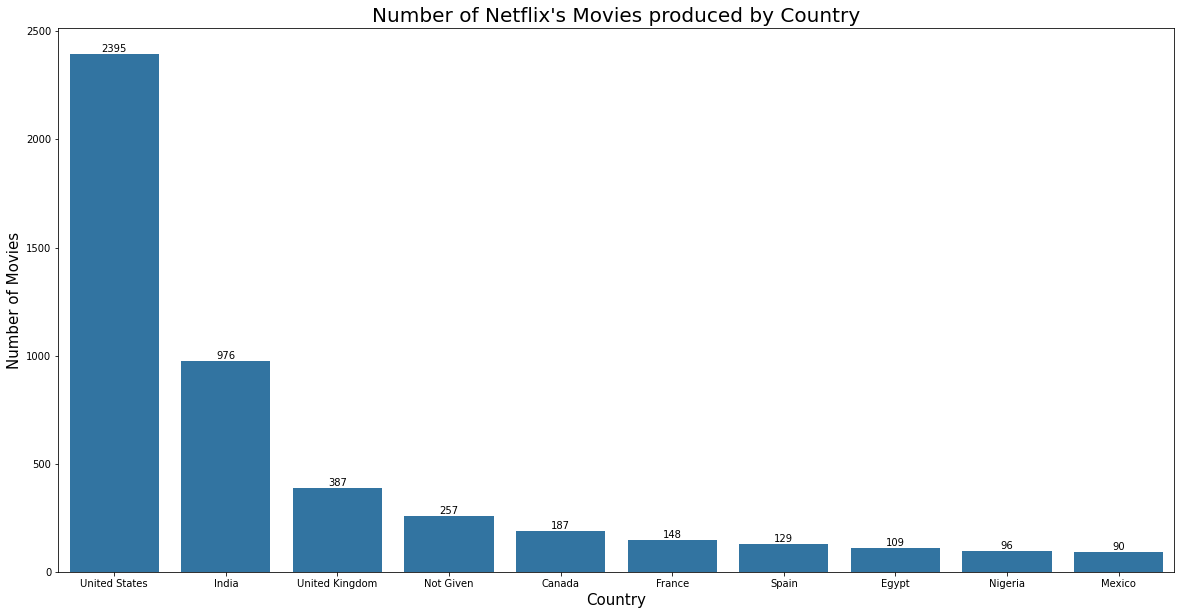

In [ ]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_movie.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_c = df_movie[df_movie['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
movie_c = sns.countplot(x='country',data=df_movie_c,order=sort_order, color = base_color)
movie_c.set_title("Number of Netflix's Movies produced by Country",fontsize = 20)
movie_c.set_xlabel('Country',fontsize = 15)
movie_c.set_ylabel('Number of Movies',fontsize = 15)
for container in movie_c.containers:
    movie_c.bar_label(container)